In [ ]:
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
df = pd.read_csv("./mystery_stock_daily_train.csv")
df.head()

,open_today,open_prev,high_prev,close_prev,low_prev,adj_close_prev,volume,ABER_ZG_5_15,ABER_SG_5_15,ABER_XG_5_15,ABER_ATR_5_15,ACCBL_20,ACCBM_20,ACCBU_20,AD,ADOSC_3_10,ADX_14,DMP_14,DMN_14,AMAT_LR_2,AMAT_SR_2,AO_5_34,OBV,OBV_min_2,OBV_max_2,OBV_EMA_4,OBV_EMA_12,AOBV_LR_2,AOBV_SR_2,BIAS_SMA_26,BOP,AR_26,BR_26,CCI_14_0.015,APO_12_26,AROOND_14,AROONU_14,AROONOSC_14,ATR_14,BBL_5_2.0,...,TRIMA_10,SQZ_20_2.0_20_1.5,SQZ_ON,SQZ_OFF,SQZ_NO,STDEV_30,STOCHFk_14,STOCHFd_3,STOCHk_5,STOCHd_3,SUPERT_7_3.0,SUPERTd_7_3.0,TRIX_30_9,TRIXs_30_9,TRUERANGE_1,TSI_13_25,TTM_TRND_6,VWAP,VWMA_10,WCP,WILLR_14,UI_14,UO_7_14_28,VAR_30,VTXP_14,VTXM_14,WMA_10,ZL_EMA_10,Z_30,LR_14,LOGRET_1,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,MAD_30,INC_1,INERTIA_20_14,KCL_20_2,KCB_20_2,KCU_20_2
0,0.001957,0.002339,0.002374,0.001953,0.001866,0.001952,7350820,0.002395,0.002702,0.002089,0.000306,0.002010,0.002678,0.003466,171043445.9,-4530208.022,18.292418,15.181800,33.968406,0,1,-0.000528,495194781,495194781,502545601,500406549.5,507915567.1,0,1,-0.301358,-0.759843,59.765713,57.550930,-239.662983,-0.000302,100.000000,0.000000,-100.000000,0.000305,0.001851,...,0.002530,-0.000489,0,1,0,0.000376,9.109948,22.494384,27.203405,36.992351,0.003007,-1,0.974590,1.319438,0.000508,-19.196900,-1,0.002362,0.002483,0.002036,-91.536965,20.278685,40.491417,1.410000e-07,0.853425,1.160815,0.002391,0.002198,-2.424116,0.002324,-0.176931,-0.000182,-0.000069,-0.000113,0.000326,0,37.019529,0.002018,0.002614,0.003210
1,0.001760,0.001957,0.002037,0.001780,0.001769,0.001779,9803180,0.002230,0.002534,0.001926,0.000304,0.001938,0.002611,0.003412,162045004.6,-7556902.285,19.925435,14.219735,34.109443,0,1,-0.000641,485391601,485391601,495194781,494400570.1,504450341.6,0,1,-0.351975,-0.660448,63.458401,60.956084,-228.831185,-0.000327,100.000000,28.571429,-71.428571,0.000302,0.001589,...,0.002475,-0.000564,0,1,0,0.000399,1.277584,10.267402,14.160311,27.050460,0.002778,-1,0.887768,1.230397,0.000268,-23.360151,-1,0.002359,0.002412,0.001841,-99.022222,21.764624,36.963975,1.600000e-07,0.871728,1.187696,0.002266,0.002010,-2.564158,0.002165,-0.092753,-0.000224,-0.000089,-0.000135,0.000333,0,35.504018,0.001944,0.002535,0.003125
2,0.001959,0.001760,0.001939,0.001939,0.001675,0.001938,9627830,0.002106,0.002407,0.001805,0.000301,0.001854,0.002552,0.003370,171672834.6,-5044703.821,21.640161,13.324020,34.203716,0,1,-0.000737,495019431,485391601,495019431,494648114.4,502999432.2,0,1,-0.281770,0.678030,63.971963,60.716731,-170.000307,-0.000335,100.000000,21.428571,-78.571429,0.000299,0.001524,...,0.002401,-0.000592,0,1,0,0.000420,32.273839,14.220457,20.206915,20.523544,0.002670,-1,0.801536,1.142970,0.000264,-25.022154,-1,0.002356,0.002365,0.001873,-78.342904,22.670444,38.039629,1.760000e-07,0.771647,1.229937,0.002186,0.001906,-1.955657,0.002081,0.085559,-0.000242,-0.000086,-0.000157,0.000344,1,36.140446,0.001893,0.002478,0.003062
3,0.001827,0.001959,0.002057,0.001824,0.001781,0.001823,6931840,0.002010,0.002309,0.001710,0.000300,0.001779,0.002486,0.003328,166900915.7,-5076714.643,22.615863,15.272948,31.938630,0,1,-0.000772,488087591,488087591,495019431,492023905.1,500705302.8,0,1,-0.309624,-0.489130,58.030507,56.683662,-124.253571,-0.000346,92.857143,14.285714,-78.571429,0.000298,0.001531,...,0.002317,-0.000634,0,1,0,0.000440,18.215159,17.255527,16.258240,16.875156,0.002670,-1,0.715431,1.056852,0.000276,-27.000587,-1,0.002355,0.002302,0.001871,-87.776866,23.710455,36.979523,1.930000e-07,0.786563,1.187080,0.002095,0.001799,-2.015769,0.001977,-0.061140,-0.000263,-0.000085,-0.000178,0.000353,0,35.920674,0.001834,0.002416,0.002997
4,0.001676,0.001827,0.001852,0.001682,0.001633,0.001681,3700410,0.001877,0.002172,0.001583,0.000294,0.001701,0.002414,0.003262,164856396.9,-5278819.164,23.868170,14.454958,33.847509,0,1,-0.000857,484387181,484387181,488087591,488969215.4,498194822.5,0,1,-0.348683,-0.662100,58.177362,56.493078,-128.010405,-0.000353,100.000000,7.142857,-92.857143,0.000292,0.001609,...,0.002213,-0.000716,0,1,0,0.000

In [ ]:
df.drop(df.iloc[:, 2:], inplace = True, axis = 1) 
df.head(-5)

,open_today,open_prev
0,0.001957,0.002339
1,0.001760,0.001957
2,0.001959,0.001760
3,0.001827,0.001959
4,0.001676,0.001827
...,...,...
867,0.002370,0.002510
868,0.002288,0.002370
869,0.002292,0.002288
870,0.002338,0.002292


In [ ]:
print(df.shape)
print(type(df))

(877, 2)
<class 'pandas.core.frame.DataFrame'>


In [ ]:
dataset = df.values # Get adjusted close prices only
print(dataset.shape)
print(type(dataset))
training_set = dataset[0:701, :]
#training_set = np.reshape(training_set, (training_set.size, 1))
print(training_set.shape)
testing_set = dataset[701:, :]
#testing_set = np.reshape(testing_set, (testing_set.size, 1))
print(testing_set.shape)

scaler = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = scaler.fit_transform(training_set)
scalerTestSet = MinMaxScaler(feature_range = (0, 1))
testing_set_scaled = scalerTestSet.fit_transform(testing_set)

x_train = []
y_train = []
for i in range(30, 702):
    x_train.append(training_set_scaled[i-30:i, 1]) # Analyze prev days values  
    y_train.append(training_set_scaled[i-1, 0]) # Predicting for next days value
  
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)
print(y_train.shape)

(877, 2)
<class 'numpy.ndarray'>
(701, 2)
(176, 2)
(672, 30, 1)
(672,)


In [ ]:
print(training_set[0:5])
print(training_set_scaled[0:5])

[[0.001957 0.002339]
 [0.00176  0.001957]
 [0.001959 0.00176 ]
 [0.001827 0.001959]
 [0.001676 0.001827]]
[[0.07301413 0.09637375]
 [0.06096741 0.07301413]
 [0.07313643 0.06096741]
 [0.06506451 0.07313643]
 [0.05583073 0.06506451]]


In [ ]:
def build_model():
    model = Sequential()
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 50))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))

    model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    return model

In [ ]:
model = build_model()

In [ ]:
model.fit(x_train, y_train, epochs = 30, batch_size = 32)

Epoch 1/30
21/21 [==============================] - 1s 42ms/step - loss: 0.0140
Epoch 2/30
21/21 [==============================] - 1s 42ms/step - loss: 0.0082
Epoch 3/30
21/21 [==============================] - 1s 42ms/step - loss: 0.0064
Epoch 4/30
21/21 [==============================] - 1s 43ms/step - loss: 0.0059
Epoch 5/30
21/21 [==============================] - 1s 42ms/step - loss: 0.0047
Epoch 6/30
21/21 [==============================] - 1s 43ms/step - loss: 0.0043
Epoch 7/30
21/21 [==============================] - 1s 44ms/step - loss: 0.0046
Epoch 8/30
21/21 [==============================] - 1s 43ms/step - loss: 0.0046
Epoch 9/30
21/21 [==============================] - 1s 44ms/step - loss: 0.0040
Epoch 10/30
21/21 [==============================] - 1s 43ms/step - loss: 0.0035
Epoch 11/30
21/21 [==============================] - 1s 44ms/step - loss: 0.0038
Epoch 12/30
21/21 [==============================] - 1s 42ms/step - loss: 0.0035
Epoch 13/30
21/21 [==================

In [ ]:
print(testing_set_scaled.shape)
print(testing_set_scaled[0:10])

(176, 2)
[[0.52766453 0.54455446]
 [0.52882935 0.52766453]
 [0.53581829 0.52882935]
 [0.57076296 0.53581829]
 [0.57658707 0.57076296]
 [0.60163075 0.57658707]
 [0.60454281 0.60163075]
 [0.56377402 0.60454281]
 [0.57542225 0.56377402]
 [0.58940012 0.57542225]]


In [ ]:
x_test = []
y_test = []
for i in range(30, 177):
    x_test.append(testing_set_scaled[i-30:i,1]) # Get row of data
    #y_test.append(testing_set_scaled[i-1, 0])   # Predicting next day
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test.shape)

# Scale back up
testing_set_unscaled = scalerTestSet.inverse_transform(testing_set_scaled) # Unscale

for i in range(30, 177):
    y_test.append(testing_set_scaled[i-1, 0])   # Predicting next day
y_test = np.array(y_test)
y_test = np.reshape(y_test, (-1, 1))
print(y_test.shape)

#y_test = scalerTestSet.inverse_transform(y_test) # Unscale

(147, 30, 1)
(147, 1)


In [ ]:
predicted_open_prices = model.predict(x_test)
print(predicted_open_prices.shape)
print(type(predicted_open_prices))

(147, 1)
<class 'numpy.ndarray'>


In [ ]:
# Scale predicted open prices
concat = np.concatenate((predicted_open_prices, y_test), axis=1)
print(concat.shape)
concat = scalerTestSet.inverse_transform(concat)

(147, 2)


In [ ]:
y_test = concat[:,1]
predicted_open_prices = concat[:,0]

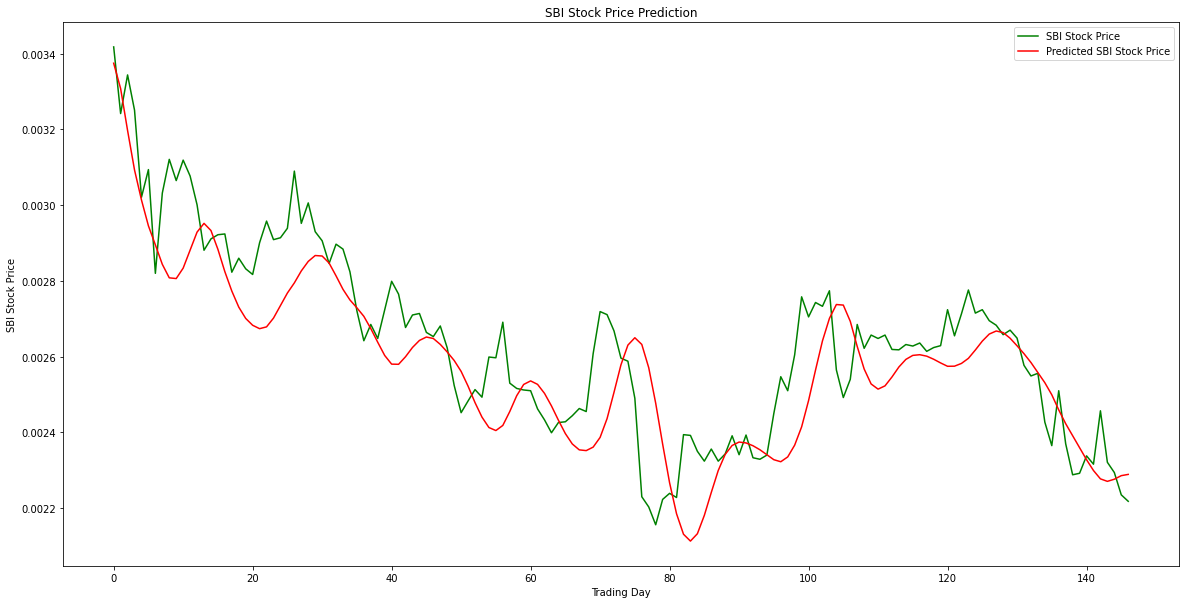

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(y_test, color = 'green', label = 'SBI Stock Price')
plt.plot(predicted_open_prices, color = 'red', label = 'Predicted SBI Stock Price')
plt.title('SBI Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('SBI Stock Price')
plt.legend()
plt.show()

In [ ]:
model.save("./model1")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./model1/assets
